# word2vec (CBOW)

## 1.Load data

### import library

In [31]:
import numpy as np 
import torch 
import torch.nn as nn
import torch.optim as optim 
import matplotlib.pyplot as plt 
import spacy
import pandas as pd 
nlp = spacy.load("en_core_web_sm")

### Load corpus data from CSV File

In [32]:
df = pd.read_csv('corpus.csv')
all_text = df.text

## 2.Tokenized

In [33]:
corpus_tokenized_str = []
for doc in all_text :
    for token in nlp(doc) :
        corpus_tokenized_str.append(str(token))


In [34]:
corpus_tokenized_str

[' ',
 'Stuning',
 'even',
 'for',
 'the',
 'non',
 '-',
 'gamer',
 ':',
 'This',
 'sound',
 'track',
 'was',
 'beautiful',
 '!',
 'It',
 'paints',
 'the',
 'senery',
 'in',
 'your',
 'mind',
 'so',
 'well',
 'I',
 'would',
 'recomend',
 'it',
 'even',
 'to',
 'people',
 'who',
 'hate',
 'video',
 'game',
 'music',
 '!',
 'I',
 'have',
 'played',
 'the',
 'game',
 'Chrono',
 'Cross',
 'but',
 'out',
 'of',
 'all',
 'of',
 'the',
 'games',
 'I',
 'have',
 'ever',
 'played',
 'it',
 'has',
 'the',
 'best',
 'music',
 '!',
 'It',
 'backs',
 'away',
 'from',
 'crude',
 'keyboarding',
 'and',
 'takes',
 'a',
 'fresher',
 'step',
 'with',
 'grate',
 'guitars',
 'and',
 'soulful',
 'orchestras',
 '.',
 'It',
 'would',
 'impress',
 'anyone',
 'who',
 'cares',
 'to',
 'listen',
 '!',
 '^_^',
 ' ',
 'The',
 'best',
 'soundtrack',
 'ever',
 'to',
 'anything',
 '.',
 ':',
 'I',
 "'m",
 'reading',
 'a',
 'lot',
 'of',
 'reviews',
 'saying',
 'that',
 'this',
 'is',
 'the',
 'best',
 "'",
 'game',
 

## 2.Tokenized

In [35]:
vocabs = list(set(corpus_tokenized_str))
vocabs

['pathetic',
 'heart',
 'ostensibly',
 'seller',
 'Magical',
 'backup',
 'Ando',
 'this',
 'Orphange',
 'reminds',
 'WM',
 'raving',
 'Mitsuda',
 'getting',
 'sizes',
 'keyboarding',
 'peoples',
 'purely',
 'cost',
 'society',
 'Stuning',
 'ridge',
 'Three',
 'Dreamwatch',
 'ones',
 'told',
 ':',
 '..',
 'hysterics',
 'happen',
 'Babylon',
 'house',
 'use',
 'Japanese',
 'rely',
 're',
 'color',
 'written',
 'because',
 'resort',
 'Built',
 'mood',
 '1988',
 'replicate',
 'Frustrating',
 'Julia',
 'It',
 'thick',
 'girl',
 'almost',
 'send',
 'follow',
 'through',
 'Captain',
 'lean',
 'awkward',
 'movies',
 'problem',
 'So',
 'personally',
 'standard',
 'fast',
 'reason',
 'us',
 'TERRIBLE',
 'support',
 'non',
 'brown',
 'acclaimed',
 'example',
 'dough',
 'job',
 'joke',
 'says',
 'ingredients',
 'coming',
 'effects',
 'writting',
 'vocals',
 'VERY',
 'weight',
 'SEA',
 'learned',
 'addition',
 'Somewhere',
 'culture',
 'inputs',
 'droppings',
 'repalcement',
 'angery',
 'without',


## 3.Numerization

In [36]:
word_2_idx = {v: idx for idx, v in enumerate(vocabs)}

In [37]:
print(word_2_idx["fun"])
# len(word_2_idx)

504


In [38]:
vocabs.append('<UNK>')
word_2_idx['<UNK>'] = len(word_2_idx) 

In [39]:
vocabs

['pathetic',
 'heart',
 'ostensibly',
 'seller',
 'Magical',
 'backup',
 'Ando',
 'this',
 'Orphange',
 'reminds',
 'WM',
 'raving',
 'Mitsuda',
 'getting',
 'sizes',
 'keyboarding',
 'peoples',
 'purely',
 'cost',
 'society',
 'Stuning',
 'ridge',
 'Three',
 'Dreamwatch',
 'ones',
 'told',
 ':',
 '..',
 'hysterics',
 'happen',
 'Babylon',
 'house',
 'use',
 'Japanese',
 'rely',
 're',
 'color',
 'written',
 'because',
 'resort',
 'Built',
 'mood',
 '1988',
 'replicate',
 'Frustrating',
 'Julia',
 'It',
 'thick',
 'girl',
 'almost',
 'send',
 'follow',
 'through',
 'Captain',
 'lean',
 'awkward',
 'movies',
 'problem',
 'So',
 'personally',
 'standard',
 'fast',
 'reason',
 'us',
 'TERRIBLE',
 'support',
 'non',
 'brown',
 'acclaimed',
 'example',
 'dough',
 'job',
 'joke',
 'says',
 'ingredients',
 'coming',
 'effects',
 'writting',
 'vocals',
 'VERY',
 'weight',
 'SEA',
 'learned',
 'addition',
 'Somewhere',
 'culture',
 'inputs',
 'droppings',
 'repalcement',
 'angery',
 'without',


In [40]:
word_2_idx

{'pathetic': 0,
 'heart': 1,
 'ostensibly': 2,
 'seller': 3,
 'Magical': 4,
 'backup': 5,
 'Ando': 6,
 'this': 7,
 'Orphange': 8,
 'reminds': 9,
 'WM': 10,
 'raving': 11,
 'Mitsuda': 12,
 'getting': 13,
 'sizes': 14,
 'keyboarding': 15,
 'peoples': 16,
 'purely': 17,
 'cost': 18,
 'society': 19,
 'Stuning': 20,
 'ridge': 21,
 'Three': 22,
 'Dreamwatch': 23,
 'ones': 24,
 'told': 25,
 ':': 26,
 '..': 27,
 'hysterics': 28,
 'happen': 29,
 'Babylon': 30,
 'house': 31,
 'use': 32,
 'Japanese': 33,
 'rely': 34,
 're': 35,
 'color': 36,
 'written': 37,
 'because': 38,
 'resort': 39,
 'Built': 40,
 'mood': 41,
 '1988': 42,
 'replicate': 43,
 'Frustrating': 44,
 'Julia': 45,
 'It': 46,
 'thick': 47,
 'girl': 48,
 'almost': 49,
 'send': 50,
 'follow': 51,
 'through': 52,
 'Captain': 53,
 'lean': 54,
 'awkward': 55,
 'movies': 56,
 'problem': 57,
 'So': 58,
 'personally': 59,
 'standard': 60,
 'fast': 61,
 'reason': 62,
 'us': 63,
 'TERRIBLE': 64,
 'support': 65,
 'non': 66,
 'brown': 67,
 'accl

In [41]:
index2word = {v:k for k, v in word_2_idx.items()}

index2word

{0: 'pathetic',
 1: 'heart',
 2: 'ostensibly',
 3: 'seller',
 4: 'Magical',
 5: 'backup',
 6: 'Ando',
 7: 'this',
 8: 'Orphange',
 9: 'reminds',
 10: 'WM',
 11: 'raving',
 12: 'Mitsuda',
 13: 'getting',
 14: 'sizes',
 15: 'keyboarding',
 16: 'peoples',
 17: 'purely',
 18: 'cost',
 19: 'society',
 20: 'Stuning',
 21: 'ridge',
 22: 'Three',
 23: 'Dreamwatch',
 24: 'ones',
 25: 'told',
 26: ':',
 27: '..',
 28: 'hysterics',
 29: 'happen',
 30: 'Babylon',
 31: 'house',
 32: 'use',
 33: 'Japanese',
 34: 'rely',
 35: 're',
 36: 'color',
 37: 'written',
 38: 'because',
 39: 'resort',
 40: 'Built',
 41: 'mood',
 42: '1988',
 43: 'replicate',
 44: 'Frustrating',
 45: 'Julia',
 46: 'It',
 47: 'thick',
 48: 'girl',
 49: 'almost',
 50: 'send',
 51: 'follow',
 52: 'through',
 53: 'Captain',
 54: 'lean',
 55: 'awkward',
 56: 'movies',
 57: 'problem',
 58: 'So',
 59: 'personally',
 60: 'standard',
 61: 'fast',
 62: 'reason',
 63: 'us',
 64: 'TERRIBLE',
 65: 'support',
 66: 'non',
 67: 'brown',
 68: '

## 2.Prepare data

### real function

In [42]:
def random_batch(batch_size, corpus):
    
    CBOW = []

    #for each corpus
    for sent in corpus_tokenized_str:
        try :
            for i in range(2, len(sent) - 2): #start from 1 to second last
                center_word = word_2_idx[sent[i]]
                outside_words = [word_2_idx[sent[i-2]], word_2_idx[sent[i-1]], word_2_idx[sent[i+1]], word_2_idx[sent[i+2]]]  #window_size = 2
                for o in outside_words:
                    CBOW.append([o, center_word])
        except :
            pass               
    #only get a batch, not the entire list
    random_inputs, random_labels = [], []   
    random_index = np.random.choice(range(len(CBOW)), batch_size, replace=False)
             
    #appending some list of inputs and labels
    for index in random_index:
        random_inputs.append([CBOW[index][0]])  #center words, this will be a shape of (1, ) --> (1, 1) for modeling
        random_labels.append([CBOW[index][1]])
        
    return np.array(random_inputs), np.array(random_labels)

In [43]:
input, label = random_batch(2, corpus_tokenized_str)
# print(random_batch(10, corpus_tokenized))
print(f"{input.shape}")
print(f"{label=}")

(2, 1)
label=array([[1440],
       [1040]])


## 3.Model

In [44]:
voc_size = len(vocabs)

In [45]:
voc_size

1600

In [46]:
vocabs

['pathetic',
 'heart',
 'ostensibly',
 'seller',
 'Magical',
 'backup',
 'Ando',
 'this',
 'Orphange',
 'reminds',
 'WM',
 'raving',
 'Mitsuda',
 'getting',
 'sizes',
 'keyboarding',
 'peoples',
 'purely',
 'cost',
 'society',
 'Stuning',
 'ridge',
 'Three',
 'Dreamwatch',
 'ones',
 'told',
 ':',
 '..',
 'hysterics',
 'happen',
 'Babylon',
 'house',
 'use',
 'Japanese',
 'rely',
 're',
 'color',
 'written',
 'because',
 'resort',
 'Built',
 'mood',
 '1988',
 'replicate',
 'Frustrating',
 'Julia',
 'It',
 'thick',
 'girl',
 'almost',
 'send',
 'follow',
 'through',
 'Captain',
 'lean',
 'awkward',
 'movies',
 'problem',
 'So',
 'personally',
 'standard',
 'fast',
 'reason',
 'us',
 'TERRIBLE',
 'support',
 'non',
 'brown',
 'acclaimed',
 'example',
 'dough',
 'job',
 'joke',
 'says',
 'ingredients',
 'coming',
 'effects',
 'writting',
 'vocals',
 'VERY',
 'weight',
 'SEA',
 'learned',
 'addition',
 'Somewhere',
 'culture',
 'inputs',
 'droppings',
 'repalcement',
 'angery',
 'without',


In [47]:
class NLP_model(nn.Module):
    
    def __init__(self, voc_size, emb_size):
        super(NLP_model, self).__init__()
        self.embedding_center_word  = nn.Embedding(voc_size, emb_size)  #is a lookup table mapping all ids in voc_size, into some vector of size emb_size
        self.embedding_outside_word = nn.Embedding(voc_size, emb_size)
    
    def forward(self, center_word, outside_word, all_vocabs):
        #center_word, outside_word: (batch_size, 1)
        #all_vocabs: (batch_size, voc_size)
        
        #convert them into embedding
        center_word_embed  = self.embedding_center_word(center_word)     #(batch_size, 1, emb_size)
        outside_word_embed = self.embedding_outside_word(outside_word)   #(batch_size, 1, emb_size)
        all_vocabs_embed   = self.embedding_outside_word(all_vocabs)     #(batch_size, voc_size, emb_size)
        
        #bmm is basically @ or .dot , but across batches (i.e., ignore the batch dimension)
        top_term = outside_word_embed.bmm(center_word_embed.transpose(1, 2)).squeeze(2)
        #(batch_size, 1, emb_size) @ (batch_size, emb_size, 1) = (batch_size, 1, 1) ===> (batch_size, 1)
        
        top_term_exp = torch.exp(top_term)  #exp(uo vc)
        #(batch_size, 1)
        
        lower_term = all_vocabs_embed.bmm(center_word_embed.transpose(1, 2)).squeeze(2)
         #(batch_size, voc_size, emb_size) @ (batch_size, emb_size, 1) = (batch_size, voc_size, 1) = (batch_size, voc_size)
         
        lower_term_sum = torch.sum(torch.exp(lower_term), 1) #sum exp(uw vc)
        #(batch_size, 1)
        
        loss_fn = -torch.mean(torch.log(top_term_exp / lower_term_sum))
        #(batch_size, 1) / (batch_size, 1) ==mean==> scalar
        
        return loss_fn

In [48]:
batch_size = 2

def prepare_sequence(seq, word2index):
    #map(function, list of something)
    #map will look at each of element in this list, and apply this function
    idxs = list(map(lambda w: word2index[w] if word2index.get(w) is not None else word2index["<UNK>"], seq))
    return torch.LongTensor(idxs)

all_vocabs = prepare_sequence(list(vocabs), word_2_idx).expand(batch_size, voc_size)
all_vocabs.shape

torch.Size([2, 1600])

In [49]:
input, label = random_batch(batch_size, corpus_tokenized_str)
input #center word

array([[1239],
       [ 768]])

In [50]:
emb_size = 2 #usually, this can be 50, 100, or 300
model = NLP_model(voc_size, emb_size)

In [51]:
input_tensor = torch.LongTensor(input)  
label_tensor = torch.LongTensor(label)

In [52]:
loss = model(input_tensor, label_tensor, all_vocabs)

In [53]:
loss

tensor(7.4809, grad_fn=<NegBackward0>)

In [54]:
batch_size = 2 #why?  no reason; 
emb_size   = 2 #why?  no reason; usually 50, 100, 300, but 2 so we can plot (50 can also plot, but need PCA)
model      = NLP_model(voc_size, emb_size)

criterion  = nn.CrossEntropyLoss()  #-log
optimizer  = optim.Adam(model.parameters(), lr=0.000123)

In [55]:
import time 
num_epochs = 10000
#for epoch
for epoch in range(num_epochs):

    #get random batch
    input_batch, label_batch = random_batch(batch_size, corpus_tokenized_str)
    input_batch = torch.LongTensor(input_batch)
    label_batch = torch.LongTensor(label_batch)
    
    # print(input_batch.shape, label_batch.shape, all_vocabs.shape)
    
    #loss = model
    loss = model(input_batch, label_batch, all_vocabs)
    
    #backpropagate
    loss.backward()
    
    #update alpha
    optimizer.step()
    
    #print epoch loss
    if (epoch + 1) % 1000 == 0:
        print(f"Epoch {epoch+1} | Loss: {loss:.6f} | Time: ??")

Epoch 1000 | Loss: 6.871079 | Time: ??
Epoch 2000 | Loss: 6.144290 | Time: ??
Epoch 3000 | Loss: 4.820350 | Time: ??
Epoch 4000 | Loss: 4.196424 | Time: ??
Epoch 5000 | Loss: 2.395793 | Time: ??
Epoch 6000 | Loss: 2.290585 | Time: ??
Epoch 7000 | Loss: 3.380125 | Time: ??
Epoch 8000 | Loss: 2.308546 | Time: ??
Epoch 9000 | Loss: 1.248704 | Time: ??
Epoch 10000 | Loss: 1.030995 | Time: ??


In [56]:
def get_embed(word):
    try:
        index = word_2_idx[word]
    except:
        index = word_2_idx['<UNK>']
    
    word = torch.LongTensor([index])

    center_embed  = model.embedding_center_word(word)
    outside_embed = model.embedding_outside_word(word)
    
    embed = (center_embed + outside_embed) / 2
    
    return  embed[0][0].item(), embed[0][1].item()


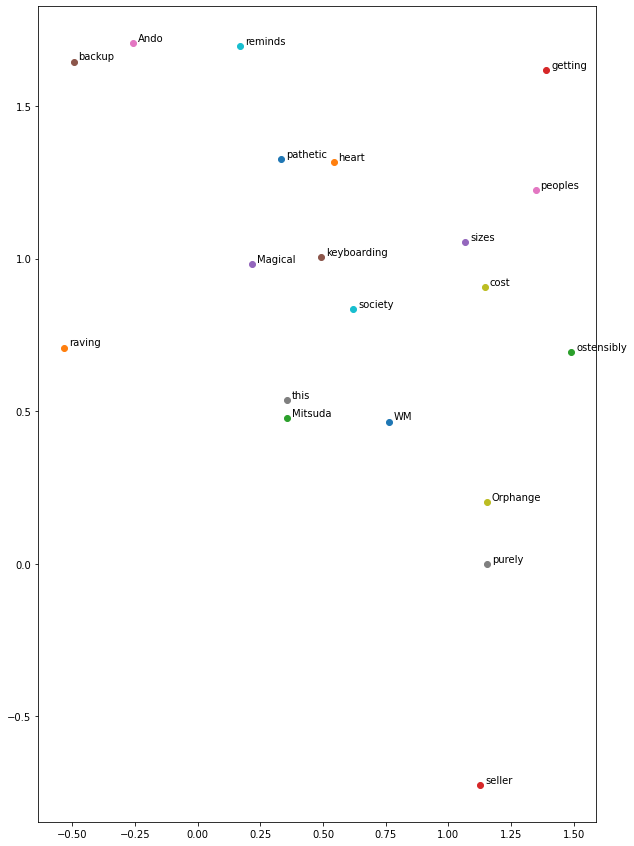

In [57]:
plt.figure(figsize=(10,15))
for i, word in enumerate(vocabs[:20]): #loop each unique vocab
    x, y = get_embed(word)
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points')
plt.show()

## Similarity test

In [58]:
from numpy import dot
from numpy.linalg import norm

def cos_sim(a, b):
    cos_sim = dot(a, b)/(norm(a)*norm(b))
    return cos_sim

In [59]:
def test_senario(a1 , a2) :
    tester1 = get_embed(a1)
    teater2 = get_embed(a2)
    print(f"{a1} similarity to {a2} = {cos_sim(tester1 , teater2)}")

In [63]:
test_senario("Japan","English")
test_senario("romantic","Awful") 
test_senario("gamer","fun") 

Japan similarity to English = 0.9058577280200047
romantic similarity to Awful = 0.6837982349089043
gamer similarity to fun = 0.1891983257300673
